<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Dogs_and_Cats_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-02-17 14:32:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 64.233.182.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   161MB/s    in 0.4s    

2022-02-17 14:32:39 (161 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('./cats_and_dogs/')
zip_ref.close()

In [ ]:
base_dir = './cats_and_dogs/cats_and_dogs_filtered/'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

Contents of base directory:
['vectorize.py', 'validation', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']
['cat.367.jpg', 'cat.20.jpg', 'cat.840.jpg', 'cat.312.jpg', 'cat.423.jpg', 'cat.652.jpg', 'cat.475.jpg', 'cat.251.jpg', 'cat.809.jpg', 'cat.658.jpg']
['dog.263.jpg', 'dog.923.jpg', 'dog.10.jpg', 'dog.373.jpg', 'dog.958.jpg', 'dog.427.jpg', 'dog.573.jpg', 'dog.163.jpg', 'dog.479.jpg', 'dog.581.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


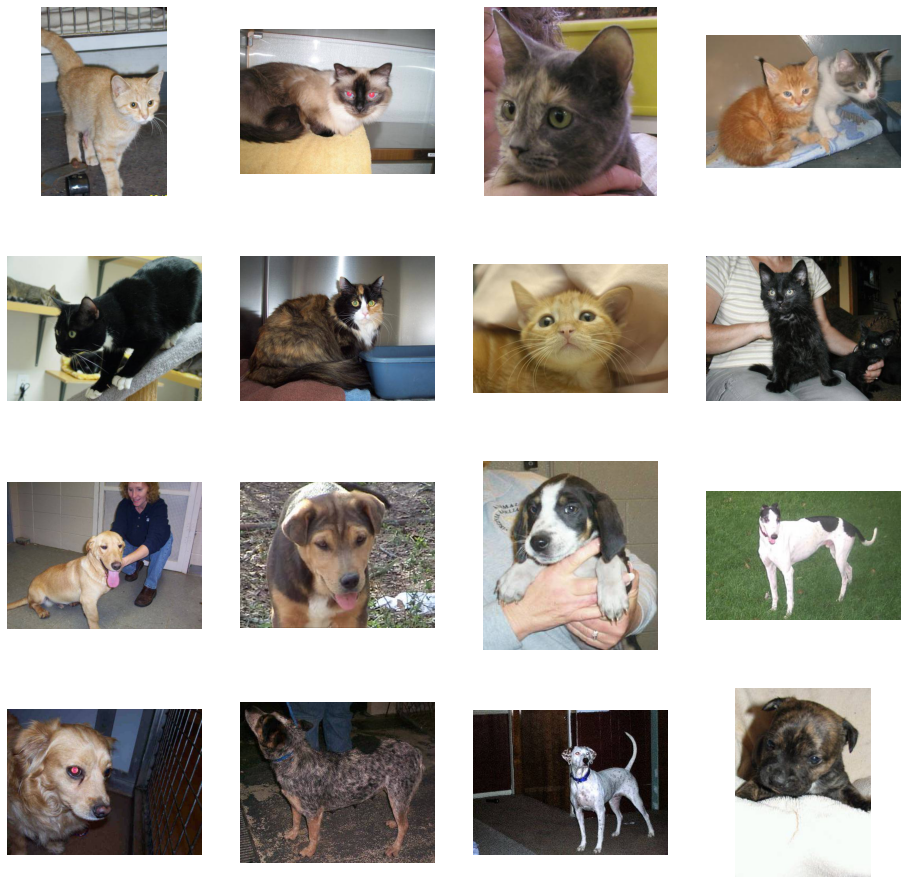

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#./cats_and_dogs/cats_and_dogs_filtered/

In [ ]:
os.listdir('./cats_and_dogs/cats_and_dogs_filtered/')

['vectorize.py', 'validation', 'train']

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_data_gen.flow_from_directory(
    './cats_and_dogs/cats_and_dogs_filtered/train',target_size=(150,150),batch_size=20,class_mode='binary'
)
test_gen = test_data_gen.flow_from_directory(
    './cats_and_dogs/cats_and_dogs_filtered/validation',target_size=(150,150),batch_size=20,class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(64,(3,3),activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer = keras.optimizers.RMSprop(0.001) , metrics=['accuracy'])

In [ ]:
class myCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs={}):
        if (logs.get('accuracy') >= 0.95):
            print('Accuracy > 0.95')
            self.model.stop_training = True
callback = myCallback()

In [ ]:
history = model.fit(train_gen , steps_per_epoch=100,validation_data=test_gen,validation_steps=50,epochs=15,callbacks=callback)

Epoch 1/15
100/100 [==============================] - 60s 585ms/step - loss: 0.8228 - accuracy: 0.5435 - val_loss: 0.6470 - val_accuracy: 0.6770
Epoch 2/15
100/100 [==============================] - 58s 580ms/step - loss: 0.6423 - accuracy: 0.6610 - val_loss: 0.6446 - val_accuracy: 0.6010
Epoch 3/15
100/100 [==============================] - 59s 585ms/step - loss: 0.5606 - accuracy: 0.7195 - val_loss: 0.7130 - val_accuracy: 0.5850
Epoch 4/15
100/100 [==============================] - 63s 626ms/step - loss: 0.4836 - accuracy: 0.7715 - val_loss: 0.5855 - val_accuracy: 0.7130
Epoch 5/15
100/100 [==============================] - 60s 598ms/step - loss: 0.4251 - accuracy: 0.8075 - val_loss: 0.6917 - val_accuracy: 0.7120
Epoch 6/15
100/100 [==============================] - 58s 582ms/step - loss: 0.3262 - accuracy: 0.8550 - val_loss: 0.6512 - val_accuracy: 0.6960
Epoch 7/15
100/100 [==============================] - 58s 582ms/step - loss: 0.2510 - accuracy: 0.8990 - val_loss: 0.7130 - val_ac

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving download.jfif to download.jfif
[0.07412338]
download.jfif is a cat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


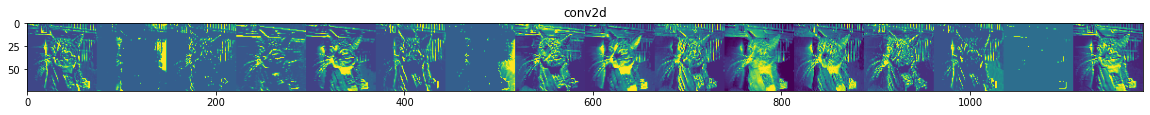

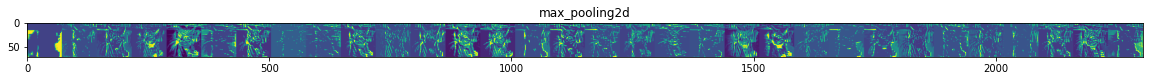

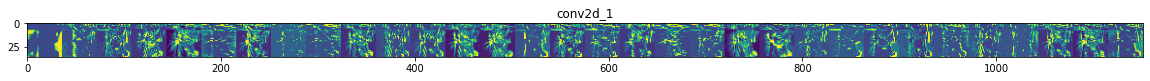

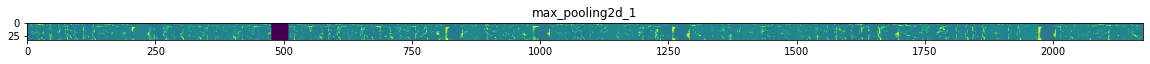

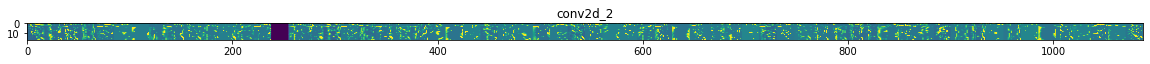

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

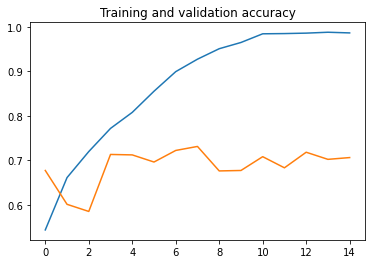

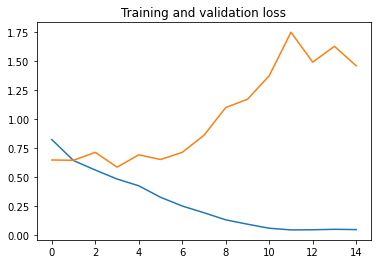

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )